In [119]:
%matplotlib inline

![pymatgen](https://camo.qiitausercontent.com/0a13a0de0e197ddde92a8704ab970b151877937c/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3134363536352f37663331353836372d623236362d336136612d393964332d6338373238376562383332302e706e67)

periodic table模組提供了以下幾種類別
#  Element

In [120]:
import pymatgen as mg

symbol = "Si"
elm = mg.Element(symbol)
print(elm.atomic_mass)
print(elm.atomic_mass.to("kg"))
print(elm.atomic_radius)
print(elm.melting_point)
print(elm.ionic_radii)
elec_structure = elm.full_electronic_structure
print(elec_structure)

28.0855 amu
4.6637069207919995e-26 kg
1.1 ang
1687.0 K
{4: 0.54}
[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 2)]


# Specie

In [121]:
import pymatgen as mg

fe2 = mg.Specie("Fe", 2)
print(fe2.atomic_mass)
print(fe2.ionic_radius)

55.845 amu
0.92 ang


# Composition

In [122]:
import pymatgen as mg

comp = mg.Composition("Fe2O3")
print("Weight of Fe2O3 is ", comp.weight)
print("Amount of Fe in Fe2O3 is ", comp["Fe"])
print("Atomic fraction of Fe is ", comp.get_atomic_fraction("Fe"))
print("Weight fraction of Fe is ", comp.get_wt_fraction("O"))

Weight of Fe2O3 is  159.6882 amu
Amount of Fe in Fe2O3 is  2.0
Atomic fraction of Fe is  0.4
Weight fraction of Fe is  0.300574494546247 


# Lattice & Structure

In [123]:
import pymatgen as mg

# http://pymatgen.org/pymatgen.core.structure.html?highlight=structure#module-pymatgen.core.structure
lattice = mg.Lattice.cubic(4.2)
print(lattice.lengths_and_angles)

## Structure object represents a crystal structure (lattice + basis)
structure = mg.Structure(lattice, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print(structure.volume)

print("First site of the structure is ",structure[0])

((4.2, 4.2, 4.2), (90.0, 90.0, 90.0))
74.08800000000001
First site of the structure is  [0. 0. 0.] Cs


In [124]:
# You can create a Structure using spacegroup symmetry as well.
li2o = mg.Structure.from_spacegroup("Fm-3m", mg.Lattice.cubic(3), ["Li", "O"], [[0.25, 0.25, 0.25], [0, 0, 0]])

# Input/output

In [125]:
structure.to(fmt="poscar")
structure.to(filename="POSCAR")
structure.to(filename="CsCl.cif")

print(structure.to(fmt="poscar"))

print(structure.to(fmt="cif"))

li2o.to(filename="Li2O.cif")

Cs1 Cl1
1.0
4.200000 0.000000 0.000000
0.000000 4.200000 0.000000
0.000000 0.000000 4.200000
Cs Cl
1 1
direct
0.000000 0.000000 0.000000 Cs
0.500000 0.500000 0.500000 Cl

# generated using pymatgen
data_CsCl
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.20000000
_cell_length_b   4.20000000
_cell_length_c   4.20000000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   CsCl
_chemical_formula_sum   'Cs1 Cl1'
_cell_volume   74.08800000
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Cs  Cs1  1  0.000000  0.000000  0.000000  1
  Cl  Cl2  1  0.500000  0.500000  0.500000  1



In [126]:
# Reading a structure is easy.
structure = mg.Structure.from_file("CsCl.cif")
print(structure)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  Cl    0.5  0.5  0.5


In [127]:
# Changing the specie of a site.
structure[1] = "F"
print(structure)

Full Formula (Cs1 F1)
Reduced Formula: CsF
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  F     0.5  0.5  0.5


In [128]:
# Changes species and coordinates (fractional assumed for structures)
structure[1] = "Cl", [0.51, 0.51, 0.51]
print(structure)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cs    0     0     0
  1  Cl    0.51  0.51  0.51


In [129]:
# Replaces all Cs in the structure with K
structure["Cs"] = "K"
print(structure)

Full Formula (K1 Cl1)
Reduced Formula: KCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  K     0     0     0
  1  Cl    0.51  0.51  0.51


In [130]:
# Replaces all K in the structure with K: 0.5, Na: 0.5, i.e., a disordered structure is created.
structure["K"] = "K0.5Na0.5"
print(structure)

Full Formula (K0.5 Na0.5 Cl1)
Reduced Formula: K0.5Na0.5Cl1
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP                    a     b     c
---  -----------------  ----  ----  ----
  0  K:0.500, Na:0.500  0     0     0
  1  Cl                 0.51  0.51  0.51


In [131]:
## http://pymatgen.org/modules.html

import pymatgen as mg

API_key="MTF9psiegrAP0BmZ"

# Material

In [132]:
## http://pymatgen.org/pymatgen.ext.matproj.html
from pymatgen import MPRester
from pprint import pprint

with mg.MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)
    # The return object is list of dict
    pprint(data)

# The general format is as follows:
#[{“material_id”: material_id, “property_name” : value}, …]

[{'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_LuAl2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.48873905\n'
         '_cell_length_b   5.48873905\n'
         '_cell_length_c   5.48873905\n'
         '_cell_angle_alpha   60.00000005\n'
         '_cell_angle_beta   60.00000003\n'
         '_cell_angle_gamma   60.00000007\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   LuAl2\n'
         "_chemical_formula_sum   'Lu2 Al4'\n"
         '_cell_volume   116.92375474\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_o

# Bandstructure

number of bands 34
True
False
{<Spin.up: 1>: array([[-20.727 , -20.7272, -20.7278, ..., -20.7699, -20.7696, -20.7695],
       [-20.727 , -20.7272, -20.7278, ..., -20.7691, -20.7694, -20.7695],
       [-20.727 , -20.7268, -20.7263, ..., -20.6418, -20.6409, -20.6406],
       ...,
       [ 14.5186,  14.4926,  14.4131, ...,  13.5619,  13.5513,  13.5579],
       [ 14.5249,  14.5289,  14.5529, ...,  14.1814,  14.3733,  14.5643],
       [ 14.551 ,  14.5415,  14.6012, ...,  14.6471,  14.6501,  14.608 ]])}
(34, 171)
[3.1603 3.1008 3.001  2.899  2.8001 2.7058 2.6164 2.5321 2.453  2.379
 2.3102 2.2464 2.1876 2.1337 2.0846 2.0402 2.0004 1.9651 1.9342 1.9077
 1.8854 1.8672 1.8531 1.8431 1.8371 1.8352 1.8352 1.7474 1.6165 1.4871
 1.3644 1.2502 1.1458 1.0523 0.9707 0.9021 0.8475 0.8079 0.7837 0.7756
 0.7756 0.8546 0.9537 1.0712 1.2044 1.3503 1.5046 1.6596 1.7958 1.8592
 1.8592 1.8683 1.8797 1.8937 1.9108 1.9311 1.955  1.9828 2.0147 2.0509
 2.0918 2.1373 2.1878 2.2431 2.3035 2.3687 2.4388 2.5134 2.592

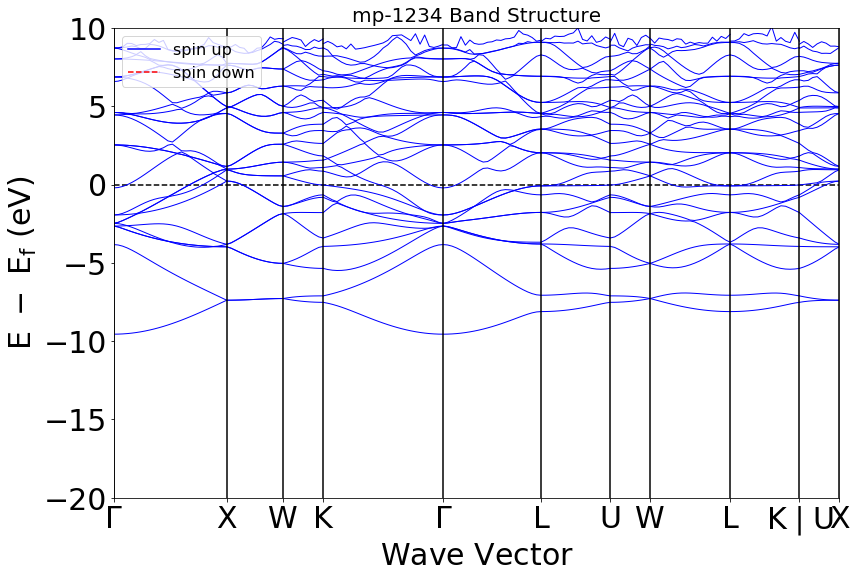

In [133]:
# http://pymatgen.org/pymatgen.electronic_structure.bandstructure.html
from pymatgen import MPRester
from pymatgen import Spin
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter
import matplotlib.pyplot as plt

with mg.MPRester(API_key) as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1234")
    print(bandstructure)
    print("number of bands", bandstructure.nb_bands)
    print(bandstructure.is_metal())
    print(bandstructure.is_spin_polarized)

    # BaandStructure物件有個bands的性質，儲存所有的能帶結構，他的shape是(dictionnary of arrays)
    # {Spin.up: np.array((nb_bands, nb_kpoints)), Spin.down: np.array((nb_bands, nb_kpoints))}
    print(bandstructure.bands)
    print(bandstructure.bands[Spin.up].shape)
    # The 9th bands of spin up
    print(bandstructure.bands[Spin.up][9, :])
    
    bsplot = BSPlotter(bandstructure)
    # get the plot
    bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
    print(bandstructure.efermi)
    # add some features
    ax = plt.gca()
    ax.set_title("mp-1234 Band Structure", fontsize=20)
    xlim = ax.get_xlim()
    ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

    # add legend
    ax.plot((), (), "b-", label="spin up")
    ax.plot((), (), "r--", label="spin down")
    ax.legend(fontsize=16, loc="upper left")

# Phase Diagram

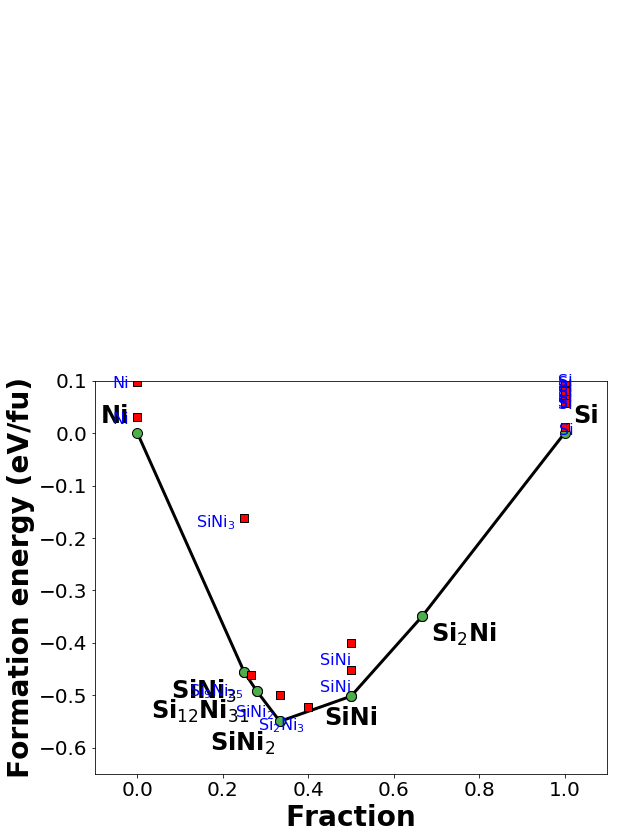

In [134]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

#This initializes the REST adaptor. Put your own API key in.

with mg.MPRester(API_key) as m: 
#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the chemical system.
    entries = m.get_entries_in_chemsys(['Ni', 'Si'])

#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
    pd = PhaseDiagram(entries)
    plotter = PDPlotter(pd, show_unstable=True)
    plotter.show() 

## Handson

1. 使用MPRester類別中提供的其他方法(get_structures，get_bandstructure_by_material_id...)來抓取任意一筆資料。 

2. 畫出mp-344的bandstructure，他的band_gap_energy為何?

3. 畫出Si-C system的相圖

4. 畫出Ca-C-O system的相圖

# Using pymatgen's MPRester high-level methods

* Formulae, e.g., "Li2O", "Fe2O3", "*TiO3
* Chemical systems, e.g., "Li-Fe-O", "*-Fe-O"
* Materials ids, e.g., "mp-1234"

In [135]:
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.get_data("Li-Fe-O")
    pprint(data)

[{'band_gap': 1.8384,
  'cif': '# generated using pymatgen\n'
         'data_Li3FeO3\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   8.86528090\n'
         '_cell_length_b   8.86528090\n'
         '_cell_length_c   3.64441976\n'
         '_cell_angle_alpha   90.00000000\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   90.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3FeO3\n'
         "_chemical_formula_sum   'Li12 Fe4 O12'\n"
         '_cell_volume   286.42663089\n'
         '_cell_formula_units_Z   4\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' 

         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li8(FeO2)5\n'
         "_chemical_formula_sum   'Li8 Fe5 O10'\n"
         '_cell_volume   257.96417602\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li1  1  0.321277  0.893098  0.464515  1\n'
         '  Li  Li2  1  0.877034  0.907737  0.338286  1\n'
         '  Li  Li3  1  0.531843  0.692262  0.244088  1\n'
         '  Li  Li4  1  0.701547  0.524215  0.072711  1\n'
         '  Li  Li5  1  0.267477  0.517226  0.947670  1\n'
         '  Li  Li6  1  0.487781  0.288833  0.735106  1\n'
         '  Li  L

                 'number': 36,
                 'point_group': 'mm2',
                 'source': 'spglib',
                 'symbol': 'Cmc2_1'},
  'tags': [],
  'task_ids': ['mp-901324', 'mp-771571', 'mp-885827', 'mp-900559'],
  'total_magnetization': 9.0007723,
  'unit_cell_formula': {'Fe': 8.0, 'Li': 4.0, 'O': 16.0},
  'volume': 282.7608249611673},
 {'band_gap': 1.2685999999999997,
  'cif': '# generated using pymatgen\n'
         'data_Li4Fe7O12\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.18540802\n'
         '_cell_length_b   9.01641347\n'
         '_cell_length_c   9.83936416\n'
         '_cell_angle_alpha   90.00000260\n'
         '_cell_angle_beta   100.76098250\n'
         '_cell_angle_gamma   89.99999845\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li4Fe7O12\n'
         "_chemical_formula_sum   'Li8 Fe14 O24'\n"
         '_cell_volume   451.93773895\n'
         '_cell_formula_units_Z   2\n'
    

         '_cell_angle_beta   95.13954944\n'
         '_cell_angle_gamma   60.48240244\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li5Fe5O12\n'
         "_chemical_formula_sum   'Li10 Fe10 O24'\n"
         '_cell_volume   443.72733035\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li1  1  0.990372  0.506285  0.502258  1\n'
         '  Li  Li2  1  0.338653  0.848576  0.502187  1\n'
         '  Li  Li3  1  0.751383  0.752679  0.625064  1\n'
         '  Li  Li4  1  0.841309  0.347684  0.747365  1\n'
         '  Li  Li5  1  0.986264  0.500985  0

                 'symbol': 'C2'},
  'tags': [],
  'task_ids': ['mp-769519', 'mp-802743', 'mp-810268', 'mp-811026'],
  'total_magnetization': 19.0012459,
  'unit_cell_formula': {'Fe': 4.0, 'Li': 21.0, 'O': 16.0},
  'volume': 406.6035899006189},
 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li5Fe3O8\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.85348103\n'
         '_cell_length_b   5.81015556\n'
         '_cell_length_c   9.90420968\n'
         '_cell_angle_alpha   91.00290093\n'
         '_cell_angle_beta   89.08673134\n'
         '_cell_angle_gamma   119.91420077\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li5Fe3O8\n'
         "_chemical_formula_sum   'Li10 Fe6 O16'\n"
         '_cell_volume   291.90779816\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"


         '_cell_volume   274.61937139\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li1  1  0.003950  0.002620  0.001310  1\n'
         '  Li  Li2  1  0.065939  0.386711  0.193355  1\n'
         '  Li  Li3  1  0.667394  0.013289  0.006645  1\n'
         '  Li  Li4  1  0.331472  0.003519  0.001759  1\n'
         '  Li  Li5  1  0.401862  0.396481  0.198241  1\n'
         '  Li  Li6  1  0.133614  0.799665  0.399833  1\n'
         '  Li  Li7  1  0.729383  0.397380  0.198690  1\n'
         '  Li  Li8  1  0.599719  0.600335  0.800167  1\n'
         '  Fe  Fe9  1  0.468494  0.801989  0.4009

         '  O  O20  1  0.833342  0.660962  0.637100  1\n',
  'density': 3.5996985093060587,
  'diel': None,
  'e_above_hull': 0.134008598250003,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -111.88758168999999,
  'energy_per_atom': -5.5943790845,
  'formation_energy_per_atom': -1.5274756292499994,
  'full_formula': 'Li4Fe4O12',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-763580',
  'nelements': 3,
  'nsites': 20,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'LiFeO3',
  'spacegroup': {'crystal_system': 'monoclinic',
                 'hall': '-C 2yc',
                 'number': 15,
                 'point_group': '2/m',
                 'source': 'spglib',
                 'symbol': 'C2/c'},
  'tags': [],
  'task_ids': ['mp-763580', 'mp-880179', 'mp-890477', 'mp-894175'],
  'total_magnetization': 3.00053995,
  'unit_cell_formula': {'Fe': 4.0,

  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -64.1834772,
  'energy_per_atom': -5.834861563636363,
  'formation_energy_per_atom': -1.617055616136364,
  'full_formula': 'Li2Fe3O6',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-763691',
  'nelements': 3,
  'nsites': 11,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li2(FeO2)3',
  'spacegroup': {'crystal_system': 'monoclinic',
                 'hall': '-C 2y',
                 'number': 12,
                 'point_group': '2/m',
                 'source': 'spglib',
                 'symbol': 'C2/m'},
  'tags': [],
  'task_ids': ['mp-806253', 'mp-800989', 'mp-804652', 'mp-763691'],
  'total_magnetization': 13.9985843,
  'unit_cell_formula': {'Fe': 3.0, 'Li': 2.0, 'O': 6.0},
  'volume': 104.81141781656515},
 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li(FeO2)3\n'
    

                                              0.0,
                                              0.0],
                                             [49.489376083730214,
                                              56.044958170232576,
                                              125.99463081631474,
                                              0.0,
                                              0.0,
                                              0.0],
                                             [-0.006307694141986395,
                                              -0.03081440023448486,
                                              0.018604292216630507,
                                              73.09698172629089,
                                              0.0,
                                              0.0],
                                             [-0.027077355802085278,
                                              -0.04332052259798826,
                                   

  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-773317',
  'nelements': 3,
  'nsites': 14,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'LiFe5O8',
  'spacegroup': {'crystal_system': 'cubic',
                 'hall': 'F -4 2 3',
                 'number': 216,
                 'point_group': '-43m',
                 'source': 'spglib',
                 'symbol': 'F-43m'},
  'tags': [],
  'task_ids': ['mp-813871', 'mp-773317', 'mp-804201', 'mp-813094'],
  'total_magnetization': 24.9999871,
  'unit_cell_formula': {'Fe': 5.0, 'Li': 1.0, 'O': 8.0},
  'volume': 139.39405097354802},
 {'band_gap': 1.6202000000000005,
  'cif': '# generated using pymatgen\n'
         'data_LiFeO2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   4.13875013\n'
         '_cell_length_b   6.12498935\n'
         '_cell_length_c   2.97727732\n'
         '_cell_angle_alpha   90.00002851\n'
         '_cell_angle_be

         '  Fe  Fe22  1  0.252071  0.411460  0.748278  1\n'
         '  Fe  Fe23  1  0.081540  0.243757  0.250160  1\n'
         '  Fe  Fe24  1  0.077737  0.913503  0.252487  1\n'
         '  O  O25  1  0.982268  0.112981  0.145523  1\n'
         '  O  O26  1  0.940075  0.440102  0.138975  1\n'
         '  O  O27  1  0.947296  0.815138  0.145332  1\n'
         '  O  O28  1  0.881797  0.010125  0.359579  1\n'
         '  O  O29  1  0.888524  0.388545  0.369092  1\n'
         '  O  O30  1  0.841943  0.712199  0.356330  1\n'
         '  O  O31  1  0.819535  0.950973  0.644385  1\n'
         '  O  O32  1  0.774813  0.274794  0.633245  1\n'
         '  O  O33  1  0.781377  0.650444  0.640453  1\n'
         '  O  O34  1  0.648148  0.780982  0.145411  1\n'
         '  O  O35  1  0.729574  0.229548  0.868868  1\n'
         '  O  O36  1  0.719821  0.840840  0.856069  1\n'
         '  O  O37  1  0.607862  0.107892  0.141680  1\n'
         '  O  O38  1  0.612948  0.482299  0.145524  1\n'
        

  'is_hubbard': True,
  'material_id': 'mp-773577',
  'nelements': 3,
  'nsites': 76,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li8Fe2O9',
  'spacegroup': {'crystal_system': 'triclinic',
                 'hall': '-P 1',
                 'number': 2,
                 'point_group': '-1',
                 'source': 'spglib',
                 'symbol': 'P-1'},
  'tags': [],
  'task_ids': ['mp-773577', 'mp-887080'],
  'total_magnetization': 5.949450125,
  'unit_cell_formula': {'Fe': 8.0, 'Li': 32.0, 'O': 36.0},
  'volume': 682.0415990851028},
 {'band_gap': 2.1431999999999998,
  'cif': '# generated using pymatgen\n'
         'data_Li4Fe2O5\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.25706029\n'
         '_cell_length_b   8.53456322\n'
         '_cell_length_c   11.69543711\n'
         '_cell_angle_alpha   65.04829098\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   90.00000000\n'
         '_symmetry_Int

  'volume': 629.1467765402656},
 {'band_gap': 0.3288,
  'cif': '# generated using pymatgen\n'
         'data_Li3FeO4\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   7.13424240\n'
         '_cell_length_b   7.13424278\n'
         '_cell_length_c   7.13424206\n'
         '_cell_angle_alpha   109.47121965\n'
         '_cell_angle_beta   109.47122160\n'
         '_cell_angle_gamma   109.47121956\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3FeO4\n'
         "_chemical_formula_sum   'Li12 Fe4 O16'\n"
         '_cell_volume   279.52567265\n'
         '_cell_formula_units_Z   4\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         

                 'elastic_tensor': [[256.0, 98.0, 37.0, 27.0, -1.0, 1.0],
                                    [98.0, 256.0, 37.0, -27.0, 0.0, -1.0],
                                    [37.0, 37.0, 141.0, 0.0, 0.0, 0.0],
                                    [27.0, -27.0, 0.0, 25.0, -0.0, -0.0],
                                    [-1.0, 0.0, 0.0, -0.0, 25.0, 27.0],
                                    [1.0, -1.0, 0.0, -0.0, 27.0, 79.0]],
                 'elastic_tensor_original': [[255.1794729162173,
                                              98.91015185735097,
                                              37.23889718061862,
                                              -29.006032832027245,
                                              0.0,
                                              0.0],
                                             [99.19823602084789,
                                              254.03300035167598,
                                              36.73685580766556,

  'diel': None,
  'e_above_hull': 0.3008310767500024,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -27.13778303,
  'energy_per_atom': -5.4275566060000004,
  'formation_energy_per_atom': -1.3606531507500002,
  'full_formula': 'Li1Fe1O3',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-1185320',
  'nelements': 3,
  'nsites': 5,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'LiFeO3',
  'spacegroup': {'crystal_system': 'cubic',
                 'hall': '-P 4 2 3',
                 'number': 221,
                 'point_group': 'm-3m',
                 'source': 'spglib',
                 'symbol': 'Pm-3m'},
  'tags': [],
  'task_ids': ['mp-1185320'],
  'total_magnetization': 4.7093032,
  'unit_cell_formula': {'Fe': 1.0, 'Li': 1.0, 'O': 3.0},
  'volume': 53.878898492052976},
 {'band_gap': 2.7818,
  'cif': '# generated using pymatgen\n'
         'data

         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li1  1  0.102389  0.246030  0.303340  1\n'
         '  Li  Li2  1  0.022116  0.255583  0.654108  1\n'
         '  Li  Li3  1  0.099019  0.980193  0.800058  1\n'
         '  Li  Li4  1  0.105145  0.529338  0.804874  1\n'
         '  Li  Li5  1  0.259958  0.979742  0.084243  1\n'
         '  Li  Li6  1  0.313083  0.534910  0.062643  1\n'
         '  Li  Li7  1  0.193560  0.021957  0.443726  1\n'
         '  Li  Li8  1  0.382464  0.750395  0.209509  1\n'
         '  Li  Li9  1  0.508102  0.246385  0.168157  1\n'
         '  Li  Li10  1  0.506113  0.516178  0.338129  1\n'
         '  Li  Li11  1  0.607146  0.965947  0.303432  1\n'
         '  

         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li5Fe3O8\n'
         "_chemical_formula_sum   'Li10 Fe6 O16'\n"
         '_cell_volume   292.29106408\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li1  1  0.181016  0.821008  0.052383  1\n'
         '  Li  Li2  1  0.359089  0.671696  0.533530  1\n'
         '  Li  Li3  1  0.346918  0.660881  0.281358  1\n'
         '  Li  Li4  1  0.678196  0.821404  0.047174  1\n'
         '  Li  Li5  1  0.855099  0.672892  0.549027  1\n'
         '  Li  Li6  1  0.181739  0.325224  0.047384  1\n'
         '  Li  Li

         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.00569562\n'
         '_cell_length_b   6.03162189\n'
         '_cell_length_c   10.41819118\n'
         '_cell_angle_alpha   89.17300474\n'
         '_cell_angle_beta   75.08061844\n'
         '_cell_angle_gamma   121.05865202\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li6Fe3O8\n'
         "_chemical_formula_sum   'Li12 Fe6 O16'\n"
         '_cell_volume   307.40527380\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li1  1  0.473734  0.476913  0.007616  1\n'
  

# Using pymatgen's MPRester query method

The way to use query is

`query(criteria, properties)`

In [136]:
# Fetch task_id, pretty_formula, elasticity for all materials with elasticity
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    elastic_data = m.query(criteria={"elasticity": {"$exists": True}}, 
                           properties=["task_id", "pretty_formula", "elasticity"])
    print(len(elastic_data))

0 of 13818 done 0.0%
500 of 13818 done 3.6%
1000 of 13818 done 7.2%
1500 of 13818 done 10.9%
2000 of 13818 done 14.5%
2500 of 13818 done 18.1%
3000 of 13818 done 21.7%
3500 of 13818 done 25.3%
4000 of 13818 done 28.9%
4500 of 13818 done 32.6%
5000 of 13818 done 36.2%
5500 of 13818 done 39.8%
6000 of 13818 done 43.4%
6500 of 13818 done 47.0%
7000 of 13818 done 50.7%
7500 of 13818 done 54.3%
8000 of 13818 done 57.9%
8500 of 13818 done 61.5%
9000 of 13818 done 65.1%
9500 of 13818 done 68.8%
10000 of 13818 done 72.4%
10500 of 13818 done 76.0%
11000 of 13818 done 79.6%
11500 of 13818 done 83.2%
12000 of 13818 done 86.8%
12500 of 13818 done 90.5%
13000 of 13818 done 94.1%
13500 of 13818 done 97.7%
13818 of 13818 done 100.0%
13817


In [137]:
#Get material ids for everything in the Materials Project database
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={}, properties=["task_id"])
    print(len(data))

SyntaxError: invalid syntax (<ipython-input-137-ad7020a5c8fc>, line 5)

In [138]:
# Get the energy for materials with material_ids "mp-1234" and "mp-2345".
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={"task_id": {"$in": ["mp-1234", "mp-1"]}}, properties=["final_energy"])
    pprint(data)

[{'final_energy': -0.85881928}, {'final_energy': -26.94573468}]


In [139]:
# Get the spacegroup symbol for all materials with formula Li2O.
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={"pretty_formula": "Li2O"}, properties=["spacegroup.symbol"])
    pprint(data)

[{'spacegroup.symbol': 'Pnma'}, {'spacegroup.symbol': 'Fm-3m'}]


In [140]:
# Get the ICSD of all compounds containing either K, Li or Na with O.
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={"elements": {"$in": ["K", "Li", "Na"], "$all": ["O"]}, "nelements": 2}, 
                   properties=["icsd_id", "pretty_formula", "spacegroup.symbol"])
    pprint(data)


[{'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'C2/c'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'Pnnm'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'C2/m'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P3'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'Pa3'},
 {'icsd_id': None, 'pretty_formula': 'KO3', 'spacegroup.symbol': 'Imm2'},
 {'icsd_id': None, 'pretty_formula': 'K2O2', 'spacegroup.symbol': 'P-62m'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P4_2/nmc'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'I4/mmm'},
 {'icsd_id': None, 'pretty_formula': 'K2O2', 'spacegroup.symbol': 'Cmce'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P2_1'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'Pbca'},
 {'icsd_id': None, 'pretty_formula': 'KO3', 'spacegroup.symbol': 'I4/mcm'},
 {'icsd_id': None, 'pretty_for

# save request result to file

In [141]:
from pymatgen import MPRester
from pprint import pprint
import json
import csv

with mg.MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)

    with open(id + '.csv', 'w') as f:
        f_csv = csv.DictWriter(f,data[0].keys())
        f_csv.writeheader()
        f_csv.writerows(data)
        
    with open(id + '.json', 'w') as f:
        json.dump(data, f)


# Manipulate data with Pandas DataFrame

In [142]:
# Load data into Pandas DataFrame object 
from pymatgen import MPRester
import pandas as pd

with mg.MPRester(API_key) as m:
    data = m.get_data("*3O4")
    df = pd.DataFrame(data)
    pprint(df)

    band_gap                                                cif    density  \
0     0.0000  # generated using pymatgen\ndata_Ag3O4\n_symme...   6.554845   
1     0.9663  # generated using pymatgen\ndata_Cr3O4\n_symme...   4.665654   
2     0.0000  # generated using pymatgen\ndata_Cu3O4\n_symme...   5.315090   
3     0.0000  # generated using pymatgen\ndata_Cu3O4\n_symme...   4.610665   
4     0.0000  # generated using pymatgen\ndata_Eu3O4\n_symme...   7.991141   
5     0.9833  # generated using pymatgen\ndata_Fe3O4\n_symme...   4.863682   
6     0.6085  # generated using pymatgen\ndata_Fe3O4\n_symme...   5.308684   
7     0.8899  # generated using pymatgen\ndata_Fe3O4\n_symme...   5.065748   
8     0.5829  # generated using pymatgen\ndata_Fe3O4\n_symme...   5.323013   
9     0.5393  # generated using pymatgen\ndata_Fe3O4\n_symme...   5.146438   
10    0.5664  # generated using pymatgen\ndata_Fe3O4\n_symme...   5.356414   
11    0.0000  # generated using pymatgen\ndata_Fe3O4\n_symme... 

In [143]:
print(df.shape)    #這個 DataFrame 有幾列有幾欄
print("---")  
print(df.info())  #關於 DataFrame 的詳細資訊
print("---")  
print(df.columns) #這個 DataFrame 的變數資訊
print("---")  
print(df.index)  #這個 DataFrame 的列索引資訊

(46, 28)
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 28 columns):
band_gap                     46 non-null float64
cif                          46 non-null object
density                      46 non-null float64
diel                         1 non-null object
e_above_hull                 46 non-null float64
elasticity                   8 non-null object
elements                     46 non-null object
energy                       46 non-null float64
energy_per_atom              46 non-null float64
formation_energy_per_atom    46 non-null float64
full_formula                 46 non-null object
hubbards                     46 non-null object
icsd_id                      0 non-null object
icsd_ids                     46 non-null object
is_compatible                46 non-null bool
is_hubbard                   46 non-null bool
material_id                  46 non-null object
nelements                    46 non-null int64
nsites                

可以透過下列方法選擇元素

* 用. 將key當作屬性選擇

In [144]:
print(df.pretty_formula)

0     Ag3O4
1     Cr3O4
2     Cu3O4
3     Cu3O4
4     Eu3O4
5     Fe3O4
6     Fe3O4
7     Fe3O4
8     Fe3O4
9     Fe3O4
10    Fe3O4
11    Fe3O4
12    Fe3O4
13    Fe3O4
14    Fe3O4
15    Fe3O4
16    Fe3O4
17    Fe3O4
18    Fe3O4
19    Fe3O4
20    Fe3O4
21    Fe3O4
22    Fe3O4
23    Fe3O4
24    Fe3O4
25    Fe3O4
26    Fe3O4
27    Fe3O4
28    Mn3O4
29    Mn3O4
30    Mn3O4
31    Mn3O4
32    Mn3O4
33    Mn3O4
34    Ni3O4
35    Ni3O4
36    Pb3O4
37    Pb3O4
38    Pb3O4
39    Pt3O4
40    Pt3O4
41    Sn3O4
42    Sn3O4
43    Ti3O4
44    Ti3O4
45    Yb3O4
Name: pretty_formula, dtype: object


* 中括號 [] 選擇元素

In [145]:
print(df[["material_id", "pretty_formula", "band_gap", "density"]])

   material_id pretty_formula  band_gap    density
0      mp-1605          Ag3O4    0.0000   6.554845
1    mp-772696          Cr3O4    0.9663   4.665654
2   mp-1178476          Cu3O4    0.0000   5.315090
3   mp-1147673          Cu3O4    0.0000   4.610665
4   mp-1193398          Eu3O4    0.0000   7.991141
5    mp-705416          Fe3O4    0.9833   4.863682
6    mp-715275          Fe3O4    0.6085   5.308684
7    mp-715614          Fe3O4    0.8899   5.065748
8     mp-18731          Fe3O4    0.5829   5.323013
9    mp-612405          Fe3O4    0.5393   5.146438
10   mp-715438          Fe3O4    0.5664   5.356414
11   mp-714989          Fe3O4    0.0000   4.085607
12   mp-542433          Fe3O4    0.2262   4.846582
13   mp-541907          Fe3O4    0.3581   4.851910
14    mp-19306          Fe3O4    0.0000   4.949994
15   mp-650112          Fe3O4    0.8744   4.845639
16    mp-31770          Fe3O4    0.7351   4.875090
17   mp-715558          Fe3O4    0.0019   4.912613
18   mp-716052          Fe3O4  

* .loc .iloc 方法選擇

In [146]:
print(df.iloc[0, 27])

196.38255949008746


* 使用布林值篩選

In [147]:
print(df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0])

   material_id pretty_formula  band_gap   density
1    mp-772696          Cr3O4    0.9663  4.665654
5    mp-705416          Fe3O4    0.9833  4.863682
6    mp-715275          Fe3O4    0.6085  5.308684
7    mp-715614          Fe3O4    0.8899  5.065748
8     mp-18731          Fe3O4    0.5829  5.323013
9    mp-612405          Fe3O4    0.5393  5.146438
10   mp-715438          Fe3O4    0.5664  5.356414
12   mp-542433          Fe3O4    0.2262  4.846582
13   mp-541907          Fe3O4    0.3581  4.851910
15   mp-650112          Fe3O4    0.8744  4.845639
16    mp-31770          Fe3O4    0.7351  4.875090
17   mp-715558          Fe3O4    0.0019  4.912613
20  mp-1182229          Fe3O4    0.8246  4.881523
21  mp-1182249          Fe3O4    0.5234  4.828676
22  mp-1181813          Fe3O4    0.7961  4.797830
23  mp-1181657          Fe3O4    0.9340  4.814383
24  mp-1192788          Fe3O4    0.6310  5.302269
27  mp-1181570          Fe3O4    0.1630  5.316617
29    mp-25696          Mn3O4    0.5211  5.068628


## save DataFrame to csv

In [148]:
df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0].to_csv("band_gap_gt_zero.csv", index = False)

## save DataFrame to json

In [149]:
df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0].to_json("band_gap_gt_zero.json", orient='index')